In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A084-64E7

 Directory of c:\Users\kamal\Desktop\Assignment\KNN

31-10-2022  09:14    <DIR>          .
31-10-2022  09:13    <DIR>          ..
31-10-2022  09:14                 0 Glass ans.ipynb
31-10-2022  09:13            10,053 glass.csv
31-10-2022  09:13               550 problem_statement(Glass).txt
31-10-2022  09:13                62 Problem_Statement(Zoo).txt
31-10-2022  09:13             4,600 Zoo.csv
               5 File(s)         15,265 bytes
               2 Dir(s)  111,025,983,488 bytes free


In [36]:
df=pd.read_csv('glass.csv')

In [37]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Seems like there is no null values

In [39]:
# Seperating features and target variables
# Assuming X dataset will be my features and Y will be my Target variables
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [40]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Each feature are seems to be well balanced i.e, no outlier present inside them except  'K','Ca','Ba' and 'Fe'.<br>
Their max values are slightly differ from third quartile.<br>
Lets check their scater plot with target variable

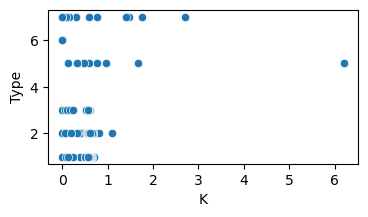

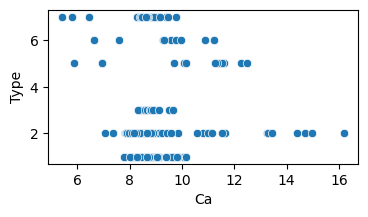

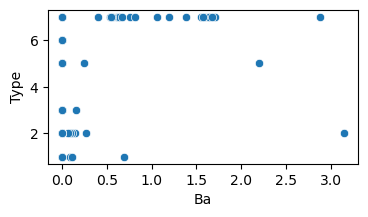

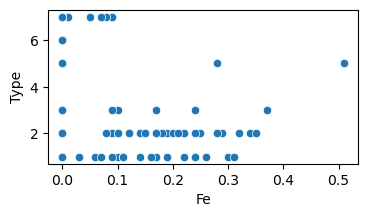

In [41]:
for i in X.columns[5:]:
    plt.figure(figsize=(4,2))
    sn.scatterplot(x=X[i],y=Y)
    plt.show()


In [42]:
# Applying Robust Scaller 
scalar = RobustScaler()
X=scalar.fit_transform(X)

In [43]:
X

array([[ 1.26375712,  0.37057221,  0.68013468, ...,  0.16085791,
         0.        ,  0.        ],
       [-0.02656546,  0.64305177,  0.08080808, ..., -0.82573727,
         0.        ,  0.        ],
       [-0.56925996,  0.2506812 ,  0.04713805, ..., -0.87935657,
         0.        ,  0.        ],
       ...,
       [ 1.12713472,  1.15531335, -2.34343434, ..., -0.17158177,
         1.64      ,  0.        ],
       [-0.44402277,  1.17711172, -2.34343434, ..., -0.12868633,
         1.57      ,  0.        ],
       [-0.21631879,  1.01362398, -2.34343434, ...,  0.02144772,
         1.67      ,  0.        ]])

In [44]:
# Spliting Data sets into train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [45]:
x_train.shape,x_test.shape

((171, 9), (43, 9))

In [77]:
# We will use KNN 
# Lets find out the best value of K
# we will iterate in between 1 to 39 and each of them must be odd no
k=[x for x in range(1,40,2)]
scores=[]
for i in k:
    scores.append(cross_val_score(KNeighborsClassifier(n_neighbors=i),x_train,y_train,cv=10).mean())

In [78]:
print(scores)

[0.7473856209150327, 0.6715686274509804, 0.6480392156862745, 0.6192810457516341, 0.6483660130718955, 0.6428104575163399, 0.631045751633987, 0.630718954248366, 0.6362745098039215, 0.6196078431372549, 0.5960784313725489, 0.595751633986928, 0.5960784313725489, 0.584313725490196, 0.5846405228758169, 0.5732026143790849, 0.5790849673202614, 0.5846405228758169, 0.5964052287581698, 0.5846405228758169]


In [49]:
# finding the value of k which results a maximum score
k[np.argmax(scores)]

1

In [51]:
# for k=1 lets check score of test dataset
# Before checking score lets findout wheather data is balanced or not
Y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [54]:
# Science the data is unbalanced we will check f1 score
model=KNeighborsClassifier(n_neighbors=1)

In [56]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7209302325581395

In [70]:
# predicted values
y_predicted=model.predict(x_test)

Text(50.722222222222214, 0.5, 'Actual')

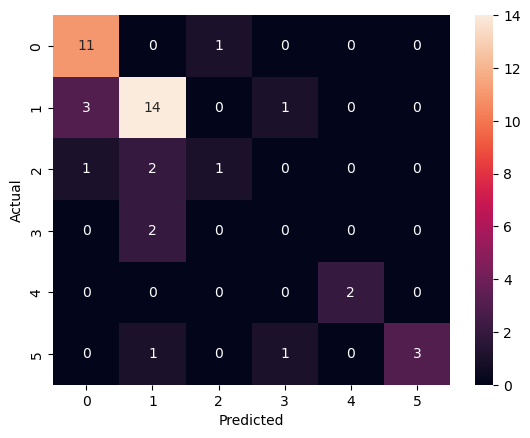

In [72]:
sn.heatmap(confusion_matrix(y_test,y_predicted),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [74]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.73      0.92      0.81        12
           2       0.74      0.78      0.76        18
           3       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.60      0.75         5

    accuracy                           0.72        43
   macro avg       0.66      0.59      0.61        43
weighted avg       0.72      0.72      0.71        43

